# Regression

## Data import

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch import nn as nn
from torch.nn import functional as F

In [2]:
dataset_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/889649d1bc273bf53967cb621a370205715b803b/dataset_day1/insurance.csv'
data = pd.read_csv(dataset_url)

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 데이터 label encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#sex
le.fit(data['sex']) 
data['sex'] = le.transform(data['sex'])
# smoker or not
le.fit(data['smoker']) 
data['smoker'] = le.transform(data['smoker'])
#region
le.fit(data['region']) 
data['region'] = le.transform(data['region'])

In [5]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


## Data setup

In [6]:
smoke_data = data[data['smoker'] == 1]

In [8]:
X = torch.from_numpy(smoke_data['bmi'].values)
y = torch.from_numpy(smoke_data['charges'].values)

In [9]:
X = X.reshape(-1, 1).float()
y = y.reshape(-1, 1).float()

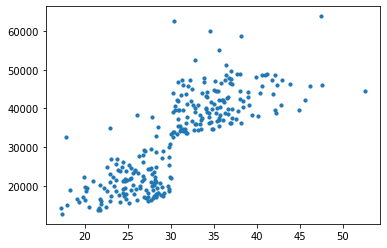

In [10]:
plt.scatter(X, y, s=10)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 과제1. 위 데이터를 nn.Module을 활용하여 linear regression하는 코드를 작성하시오
#### 단, epoch=10000, learning rate=0.0001로 하시오

In [15]:
# 모델
class my_LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [19]:
model = my_LinearRegression()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
nb_epochs = 10000
for epoch in range(nb_epochs + 1):
    # Calculate H(X)
    hypothesis = model(X_train)
    
    # Calculate cost
    cost = F.mse_loss(hypothesis, y_train)
    
    # Parameter gradient descent
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 

In [20]:
hx = (model(X_train)).detach().numpy()

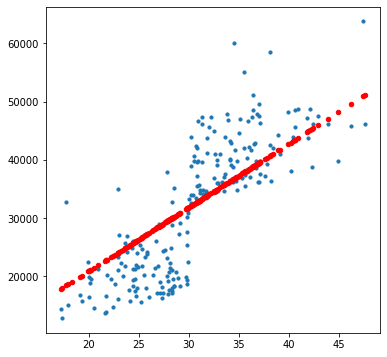

In [21]:
plt.figure(figsize=[6, 6])
plt.scatter(X_train, y_train, s=10)
plt.scatter(X_train, hx, s=20, c='r')